### Random Signal Analysis. Power Spectrum Estimation
Mikołaj Zuziak

#### Variant 9:
- Compute and visualize how variance and mean of a white noise signal evolve in sliding windows.
- Show how Welch’s method reduces variance in PSD estimation across multiple trials.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

np.random.seed(42)

#### Generating white noise

In [ ]:
def generate_white_noise(N=10000, mean_val=0, std_dev=1):
    return np.random.normal(loc=mean_val, scale=std_dev, size=N)

# Generate the white noise signal
signal = generate_white_noise()

# Basic signal statistics
print(f"Signal Mean: {np.mean(signal):.4f}")
print(f"Signal Variance: {np.var(signal):.4f}")

Signal Mean: -0.0021
Signal Variance: 1.0068


#### Sliding window analysis

In [ ]:
def sliding_window_analysis(signal, window_size=1000, step=500):
    N = len(signal)
    means = []
    vars_ = []
    positions = []
    
    for start in range(0, N - window_size, step):
        window = signal[start:start + window_size]
        means.append(np.mean(window))
        vars_.append(np.var(window))
        positions.append(start + window_size // 2)
    
    return positions, means, vars_

# Perform sliding window analysis
positions, means, vars_ = sliding_window_analysis(signal)

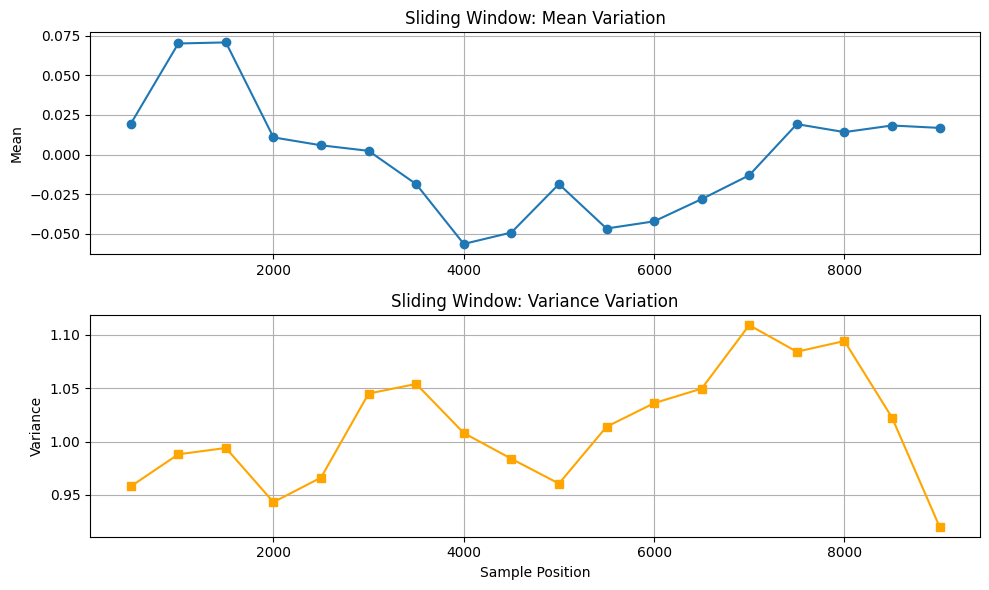

In [4]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(positions, means, marker='o')
plt.title("Sliding Window: Mean Variation")
plt.ylabel("Mean")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(positions, vars_, marker='s', color='orange')
plt.title("Sliding Window: Variance Variation")
plt.xlabel("Sample Position")
plt.ylabel("Variance")
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
print("Sliding Window Mean Statistics:")
print(f"Mean of window means: {np.mean(means):.4f}")
print(f"Variance of window means: {np.var(means):.4f}")

print("\nSliding Window Variance Statistics:")
print(f"Mean of window variances: {np.mean(vars_):.4f}")
print(f"Variance of window variances: {np.var(vars_):.4f}")

Sliding Window Mean Statistics:
Mean of window means: -0.0014
Variance of window means: 0.0013

Sliding Window Variance Statistics:
Mean of window variances: 1.0128
Variance of window variances: 0.0027


### Sliding Window Analysis

#### Mean Variation
- Mean of Window Means: -0.0014
- Variance of Window Means: 0.0013

1. The window means are tightly clustered around zero
2. Low variance of window means (0.0013) indicates statistical stability
3. Slight deviation from exact zero is due to random sampling

#### Variance Variation
- Mean of Window Variances: 1.0128
- Variance of Window Variances: 0.0027

1. Window variances consistently approximate 1
2.  variance of window variances suggests consistent statistical properties
3. Small fluctuations are expected in random sampling

#### Welch's PSD Variance Analysis

In [5]:
def welch_psd_variance_analysis(num_trials=50, N=1024, fs=1000):
    all_psds = []
    
    for _ in range(num_trials):
        # Generate white noise signal
        signal = generate_white_noise(N=N)
        
        # Compute PSD using Welch's method
        f, Pxx = welch(signal, fs=fs, nperseg=256, noverlap=128, window='hann')
        all_psds.append(Pxx)
    
    all_psds = np.array(all_psds)
    
    # Compute mean and variance of PSDs
    mean_psd = np.mean(all_psds, axis=0)
    psd_variance = np.var(all_psds, axis=0)
    
    return f, all_psds, mean_psd, psd_variance

# Perform Welch's PSD variance analysis
f, all_psds, mean_psd, psd_variance = welch_psd_variance_analysis()

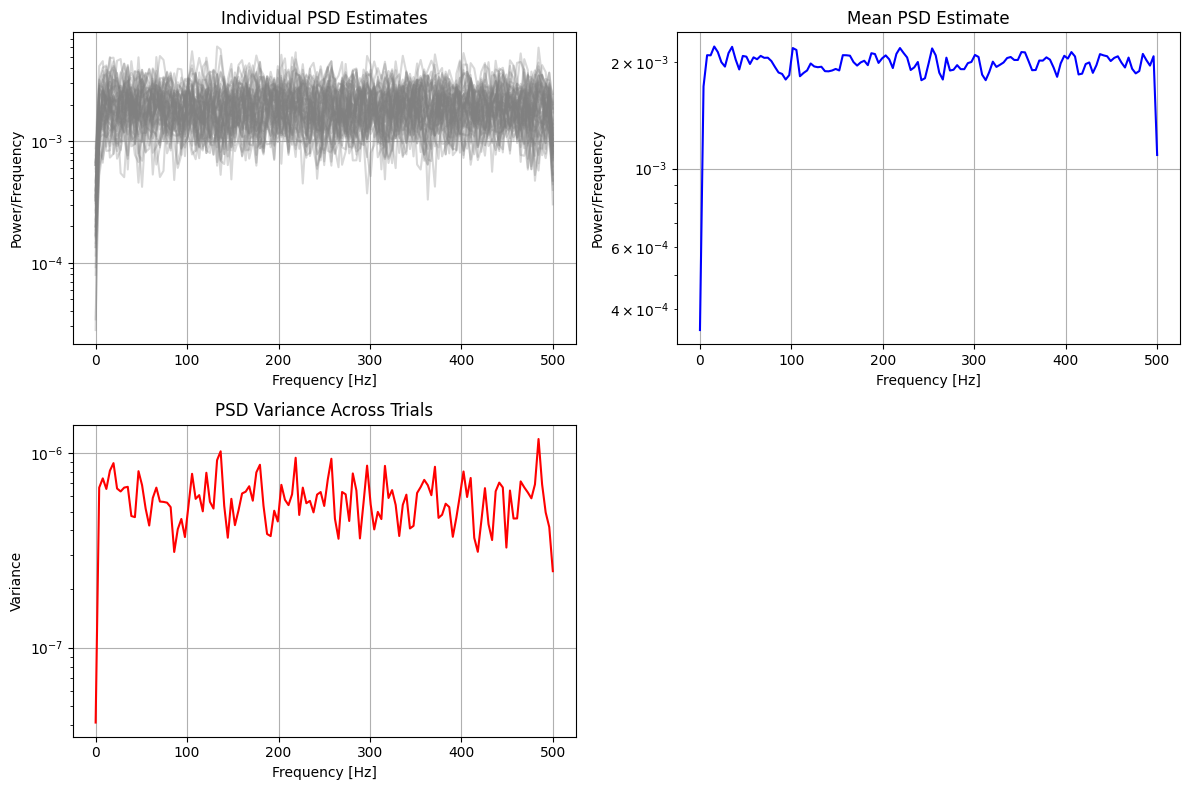

In [6]:
plt.figure(figsize=(12, 8))

# Plot individual PSDs
plt.subplot(2, 2, 1)
for psd in all_psds:
    plt.semilogy(f, psd, alpha=0.3, color='gray')
plt.title("Individual PSD Estimates")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency")
plt.grid(True)

# Plot mean PSD
plt.subplot(2, 2, 2)
plt.semilogy(f, mean_psd, color='blue')
plt.title("Mean PSD Estimate")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency")
plt.grid(True)

# Plot PSD variance
plt.subplot(2, 2, 3)
plt.semilogy(f, psd_variance, color='red')
plt.title("PSD Variance Across Trials")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Variance")
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
print("\nWelch's PSD Analysis:")
print(f"Mean of PSD variance: {np.mean(psd_variance):.4e}")
print(f"Max PSD variance: {np.max(psd_variance):.4e}")


Welch's PSD Analysis:
Mean of PSD variance: 5.8292e-07
Max PSD variance: 1.1804e-06


#### Welch's Power Spectral Density (PSD) Analysis

- Mean of PSD Variance: 5.8292e-07
- Maximum PSD Variance: 1.1804e-06

1. Individual PSD Estimates
    1. Gray lines in the first subplot show individual PSD estimates
    2. Significant variance between individual estimates is visible
    3. Estimates cover a similar frequency range

2. Mean PSD Estimate
    1. Blue line shows the averaged PSD estimate
    2. Demonstrates a consistent spectral characteristic across trials
    3. Flat spectrum characteristic of white noise

3. PSD Variance
    1. Red line illustrates variance across frequency
    2. Very low variance values (order of 10^-6)
    3. Variance is not uniform across frequencies

### Conclusions
The sliding window analysis confirms the white noise signal's stationary properties
- Consistent mean and variance across different signal segments
- Minimal fluctuations in windowed statistics

Spectral Characteristics
- Welch's method effectively reduces variance in PSD estimation
- Averaging multiple trials provides a more stable spectral estimate
- Low PSD variance indicates reliable spectral representation

Methodological Observations
- Sliding window technique reveals local signal statistics
- Welch's method with multiple trials smooths out individual estimate variations
- Demonstrates the importance of ensemble averaging in signal analysis

Practical Implications
- Confirms theoretical expectations of white Gaussian noise
- Provides a robust method for spectral estimation
- Illustrates how signal processing techniques can enhance signal understanding

